# Project Prompt

In this project you must perform and explain simple linear regression using Python on the powerproduction dataset available on Moodle. The goal is to accurately predict wind turbine power output from wind speed values using the data set as a basis. Your submission must be in the form of a git repository containing, at a minimum, the following items:

1. Jupyter notebook that performs simple linear regression on the data set.
2. In that notebook, an explanation of your regression and an analysis of its accuracy.
3. Standard items in a git repository such as a README.

To enhance your submission, you might consider comparing simple linear regression to other types of regression on this data set. Rest assured, all the above concepts will be explored in lecture videos and other materials in the coming semester.




# Approach

As the relationship between speed and power in the dataset is not linear but quadratic, I am not entirely certain of what the lecturer intended to communicated by the project prompt. I presume the reference to simple linear regression is supposed to be a kind of 'trap' as the relationship between speed and power is clearly quadratic. This would seem to be yet another case of the very poor standard expected of students on this course and the unending condenscion shown towards our intelligence.


1. Read the dataset into a Pandas dataframe, display the dataframe, plot its two variables using pyplot, and perform a visual analysis.

2. Manually perform simple linear regression on the dataset, plot the linear regression model applied to the Speed values, and calculate the cost of the linear regression model. Use polyfit function to visually verify that the manual method was correctly carried out.

4. Repeat step 2 but this time using quadratic regressions of various polynomial degrees, and plotting models for comparison

5. Determine which of the calculated models is most accurate by measuring their cost, as well as their root mean squared error.

6. Define the chosen model mathematically, and define a function that takes a speed value as input and returns the predicted power value, using the chosen model.

In [1]:
# Numerical arrays
import numpy as np

# Data frames.
import pandas as pd

# Plotting
import matplotlib.pyplot as plt

# Plot style.
plt.style.use("ggplot")

# Make matplotlib show interactive plots in the notebook.
%matplotlib inline

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/ianmcloughlin/2020A-machstat-project/master/dataset/powerproduction.csv')
# the first and last few rows have power values of zero, so we increase the number displayed
pd.set_option('display.min_rows', 30)
df

,speed,power
0,0.000,0.000
1,0.125,0.000
2,0.150,0.000
3,0.225,0.000
4,0.275,0.000
5,0.325,4.331
6,0.400,5.186
7,0.450,3.826
8,0.501,1.048
9,0.526,5.553


Text(0, 0.5, 'power')

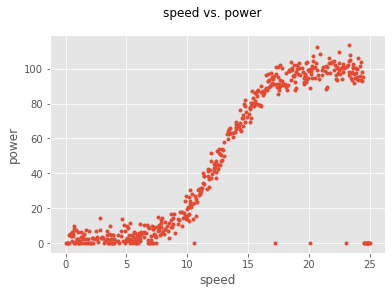

In [3]:
columns = df.columns
plt.plot(df[columns[0]], df[columns[1]], '.')
plt.suptitle(f'{columns[0]} vs. {columns[1]}')
plt.xlabel(f'{columns[0]}')
plt.ylabel(f'{columns[1]}')

We can immediately see that we are dealing with a [Sigmoid-like function](https://en.wikipedia.org/wiki/Sigmoid_function):



<img src="https://upload.wikimedia.org/wikipedia/commons/8/88/Logistic-curve.svg" width="400" height="500" align="left">

<br><br><br><br><br><br><br><br><br><br><br><br><br><br>

However, more relevant to our purpose is the even more basic fact that there is clearly a very strong relationship between speed and power, although it not linear but quadratic. The other important thing to notice is that there are a clear number of outliers in the sample where speed is relatively high but power is 0, and in particular, the last 10 points in the sample have power of zero, even though they have a very high speed value. Because these points clearly are not typical outliers in the sense that they all have the same y value and are so far from what we would expect them to be, there are really only three interpretations of their values:

1. They were incorrectly measured (perhaps the power values simply weren't recorded, and thus were entered as zero.

2. They values are accurate, and are explained by an external influence that over-rided the relationship between speed and power (e.g. perhaps their was no capacity on those days to store the electricity generated, so despite high speeds zero power was generated).

3. For speeds higher than a certain value, power is always zero.

Although the repeated zero values for power for the last ten points of the sample is suspicious, the most responsible response to these zero values would likely be to first include then as legitimate values, analyze their effect on the models, and then decide from there whether how to deal with them. For that reason I will not (at least a first) shed the sample of those points where speed is high but power is zero.

First, then, due to the ridiculous project prompt, we must perform simple linear regression...

## Simple Linear Regression - Manual

m is 4.917596 and c is -13.899903.


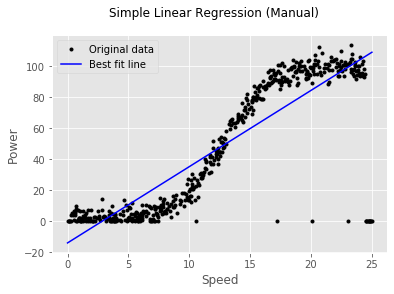

Cost with m =  4.92 and c = -13.90: 234241.16


In [4]:
# Calculate the best values for m and c.

# First calculate the means (a.k.a. averages) of each column of dataframe
s_avg = np.mean(df[columns[0]])
p_avg = np.mean(df[columns[1]])

# Subtract means from values
s_zero = df[columns[0]] - s_avg
p_zero = df[columns[1]] - p_avg

# The best m is found by the following calculation.
m = np.sum(s_zero * p_zero) / np.sum(s_zero * s_zero)
# Use m from above to calculate the best c.
c = p_avg - m * s_avg

print("m is %8.6f and c is %6.6f." % (m, c))


# Plot the best fit line.
plt.plot(df[columns[0]], df[columns[1]], 'k.', label='Original data')
plt.plot(df[columns[0]], m * df[columns[0]] + c, 'b-', label='Best fit line')

# Add axis labels and a legend.
plt.suptitle("Simple Linear Regression (Manual)")
plt.xlabel('Speed')
plt.ylabel('Power')
plt.legend()

# Show the plot.
plt.show()

cost = lambda m,c: np.sum([(df[columns[1]][i] - m * df[columns[0]][i] - c)**2 for i in range(df[columns[0]].size)])

print("Cost with m = %5.2f and c = %5.2f: %8.2f" % (m, c, cost(m, c)))


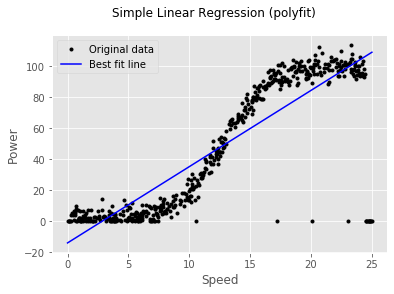

In [5]:
# this time will will simply use numpy's polyfit method
m, c = np.polyfit(df[columns[0]], df[columns[1]], 1)


plt.plot(df[columns[0]], df[columns[1]], 'k.', label='Original data')
plt.plot(df[columns[0]], m * df[columns[0]] + c, 'b-', label='Best fit line')

# Add axis labels and a legend.
plt.suptitle("Simple Linear Regression (polyfit)")
plt.xlabel('Speed')
plt.ylabel('Power')
plt.legend()

# Show the plot.
plt.show()

We can see that our manual simple linear regression conforms with the results of polyfit(). However, as expected, it is clear that a straight line will not adequately account for the function f(power) = speed. When speed is between 3 and 12, power is consistently under-estimated; when speed is between 12 and 22, power is consistently overestimated. This is obviously due to the fact that the relationship between speed and power is quadratic rather than linear. There is really no need to train a linear regression model and then test for predictive capacity - clearly a quadratic model will perform better.

We will thus need to perform quadratic regression to create a satisfactory model for predicting power based on speed.


## Quadratic Linear Regression

The quick-win next step would be to use the polyfit method again but with different third parameter values (the third parameter refers to the highest exponent value in the line equation to be created), i.e. 2, 3, 4 etc. This will calculate a quadratic regression with 2, 3, 4, etc. as the highest power in the function.

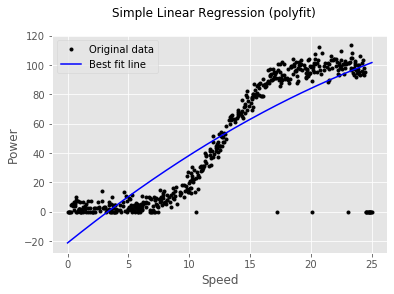

Cost: 228833.27


In [6]:
# this time will will simply use numpy's polyfit method
sq, one, const = np.polyfit(df[columns[0]], df[columns[1]], 2)


plt.plot(df[columns[0]], df[columns[1]], 'k.', label='Original data')
plt.plot(df[columns[0]], (sq*df[columns[0]]**2 + one * df[columns[0]] + const), 'b-', label='Best fit line')

# Add axis labels and a legend.
plt.suptitle("Simple Linear Regression (polyfit)")
plt.xlabel('Speed')
plt.ylabel('Power')
plt.legend()

# Show the plot.
plt.show()


cost = np.sum([(df[columns[1]][i] - (sq*df[columns[0]][i]**2 + one * df[columns[0]][i] + const))**2 for i in range(df[columns[0]].size)])

print(f"Cost: {cost.round(2)}")

A quadratic function with the highest exponent as 2 is clearly not a good model for our data. We should try 3 as the highest exponent next.

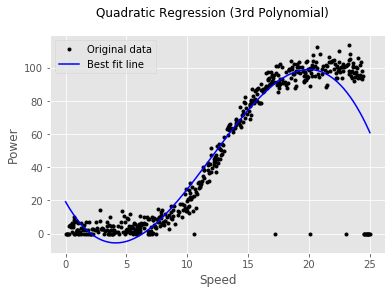

Cost: 103967.82


In [7]:
# this time will will simply use numpy's polyfit method
three, two, one, zero = np.polyfit(df[columns[0]], df[columns[1]], 3)


plt.plot(df[columns[0]], df[columns[1]], 'k.', label='Original data')
plt.plot(df[columns[0]], (three*df[columns[0]]**3 + two*df[columns[0]]**2 + one * df[columns[0]] + zero), 'b-', label='Best fit line')

# Add axis labels and a legend.
plt.suptitle("Quadratic Regression (3rd Polynomial)")
plt.xlabel('Speed')
plt.ylabel('Power')
plt.legend()

# Show the plot.
plt.show()

cost = np.sum([(df[columns[1]][i] - (three*df[columns[0]][i]**3 + two*df[columns[0]][i]**2 + one * df[columns[0]][i] + zero))**2 for i in range(df[columns[0]].size)])

print(f"Cost: {cost.round(2)}")

Clearly, this is a better model for our sample, with the cost less than half our previous attempts. However, there are still a number of issues:

1. Power should not be below zero.

2. When speed is between 8 and 12, the model consistently overestimates power

3. It is likely not the case that for points where speed is less than 4, power increases as speed increases.

4. The model appears to be unduly influenced by the last ten points in our sample, where speed is highest but power is zero. This results in a sharp decline in power for speed values over 20.

The fourth point above is the most concerning (the third point is really an effect of the fourth). While the first and second points are likely simply due to a lack of accuracy in our model, the fourth point suggests we should perhaps be treating those last ten points in our sample differently from the rest. It is clear that there is not a continuous relationship between speed and power; rather there is a point of discontinuity past which speed increases but power is always equal to zero. If we look at the values in our sample, a speed value of 24.399 is the highest speed value for which power is not zero. Erring on the side of caution, we can take that point as the discontinuity point. Thus the mathematical definition of the relationship between speed (x) and power (y) will be as follows:

$x > 0 \\y > 0\\0 < x < 24.400, f(x) = y \\x >= 24.400, f(x) = 0$

<br>
The challenge from a regression perspective is now to define $f(x) = y$.

It is important also to consider here, however, the other points in our sample where speed is greater than 10 and yet power is zero. There is a legitimate question as to whether we should include or exclude those points. While it is possible that they were incorrectly measured (or power simply was not measured for those points at all and zero was entered in the transcription phase), it is also possible that some external influence may have over-rided the relationship between speed and power and caused power to be zero.  Because these points are randomly dispersed and are few in number, the more responsible approach would be to assume the latter is true, and to include them in our calculations. This way, our models will account for that that on some occasions despite relatively high speeds, power can remain at zero.

In the below cells, then, I will first show that the cost of our model is dramatically decreased if we exclude the final ten data points. I will then proceed to plot a calculate the cost for quadratic regressions of increasing polynomial sizes, using polyfit(). Of course, the models will increase in accuracy the higher the polynomial, so we will have to determine an acceptable polynomial to use for our model. I will also calculate the [root mean square deviation] (https://en.wikipedia.org/wiki/Root-mean-square_deviation) for each model, as this is a more intuitive measure of error that the cost function already used. Root mean square deviation can be calculated as follows:




$${\displaystyle \operatorname {RMSD} ={\sqrt {\frac {\sum _{t=1}^{T}({\hat {y}}_{t}-y_{t})^{2}}{T}}}.}$$


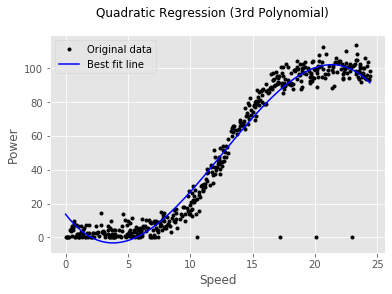

If we exclude the final ten datapoints from our calculations, cost is descreased by over a half: 46458.55


In [8]:
# this time will will simply use numpy's polyfit method
three, two, one, zero = np.polyfit(df[columns[0]][:490], df[columns[1]][:490], 3)


plt.plot(df[columns[0]][:490], df[columns[1]][:490], 'k.', label='Original data')
plt.plot(df[columns[0]][:490], (three*df[columns[0]][:490]**3 + two*df[columns[0]][:490]**2 + one * df[columns[0]][:490] + zero), 'b-', label='Best fit line')

# Add axis labels and a legend.
plt.suptitle("Quadratic Regression (3rd Polynomial)")
plt.xlabel('Speed')
plt.ylabel('Power')
plt.legend()

# Show the plot.
plt.show()

cost = np.sum([(df[columns[1]][i] - (three*df[columns[0]][i]**3 + two*df[columns[0]][i]**2 + one * df[columns[0]][i] + zero))**2 for i in range(df[columns[0]].size-10)])

print(f"If we exclude the final ten datapoints from our calculations, cost is descreased by over a half: {cost.round(2)}")


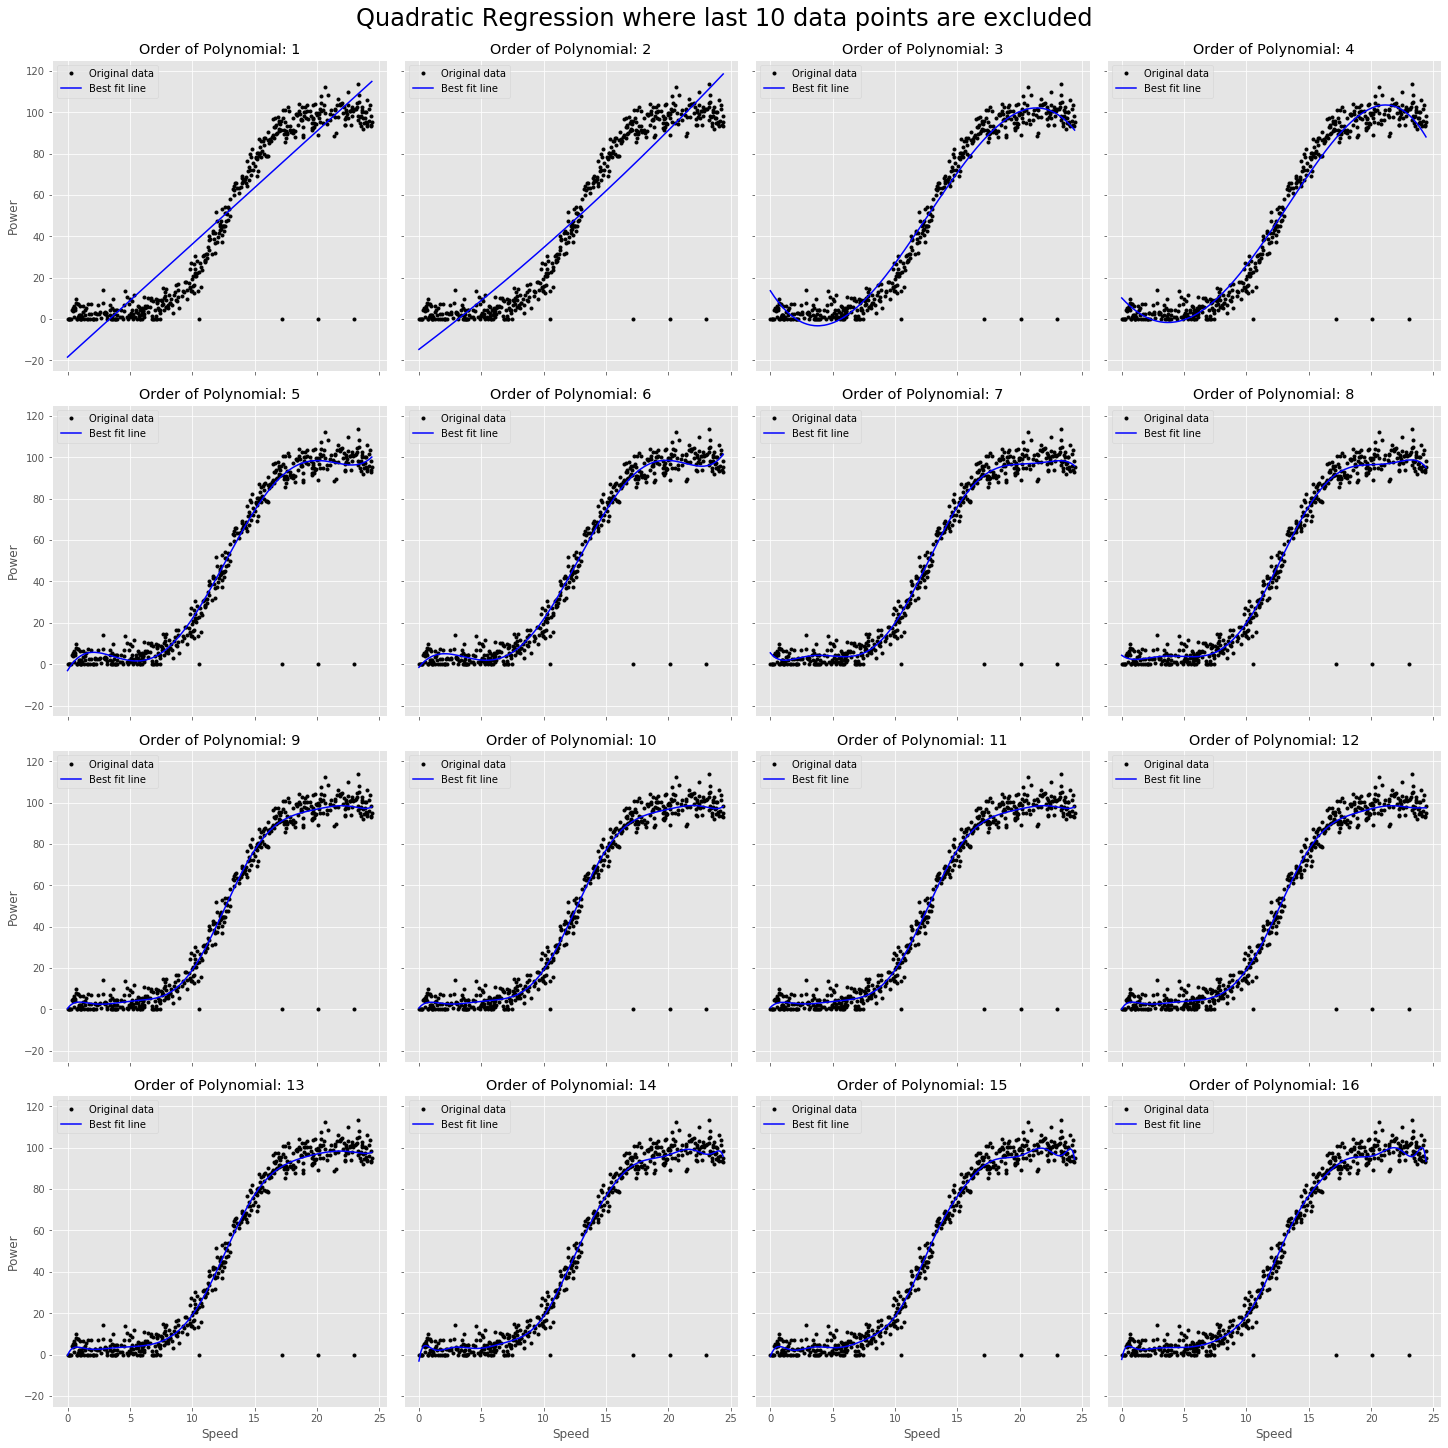

In [9]:
#store the cost values for each regression model when excluding last ten data points
costsWithout = np.empty(0)
rmseWithout = np.empty(0)

ncols = 4
nrows = ncols
size = ncols**2
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(20,20), sharex=True, sharey=True, constrained_layout=True)
axes = axes.flatten()
for i in range(size):
    polys = np.empty(500)
    polys = np.polyfit(df[columns[0]][:490], df[columns[1]][:490], i+1)
    elements = []
    for j in range(len(polys)):
        if j == len(polys)-1:
            elements.append(df[columns[0]][:490]-df[columns[0]][:490]+polys[j])
            continue
        elements.append(polys[j]*df[columns[0]][:490]**(len(polys)-1-j))
    axes[i].plot(df[columns[0]][:490], df[columns[1]][:490], 'k.', label='Original data')
    axes[i].plot(df[columns[0]][:490], np.sum(elements, axis=0), 'b-', label='Best fit line')
    axes[i].set_title(f"Order of Polynomial: {len(polys)-1}")
    axes[i].legend()
    if i >= size - ncols:
        axes[i].set_xlabel('Speed')
    if i % ncols == 0:
        axes[i].set_ylabel('Power')
    cost = np.sum([(df[columns[1]][i] - (np.sum(elements, axis=0))[i])**2 for i in range(df[columns[0]].size-10)])
    rmse = np.sqrt(np.sum([(df[columns[1]][i] - (np.sum(elements, axis=0))[i])**2 for i in range(df[columns[0]].size-10)]) / 490)
    rmseWithout = np.append(rmseWithout, [rmse])
    costsWithout = np.append(costsWithout, [cost])
fig.suptitle("Quadratic Regression where last 10 data points are excluded", fontsize=24)
plt.show()


#for key, value in costsWithout.items():
#print(f"{key}: {value}")

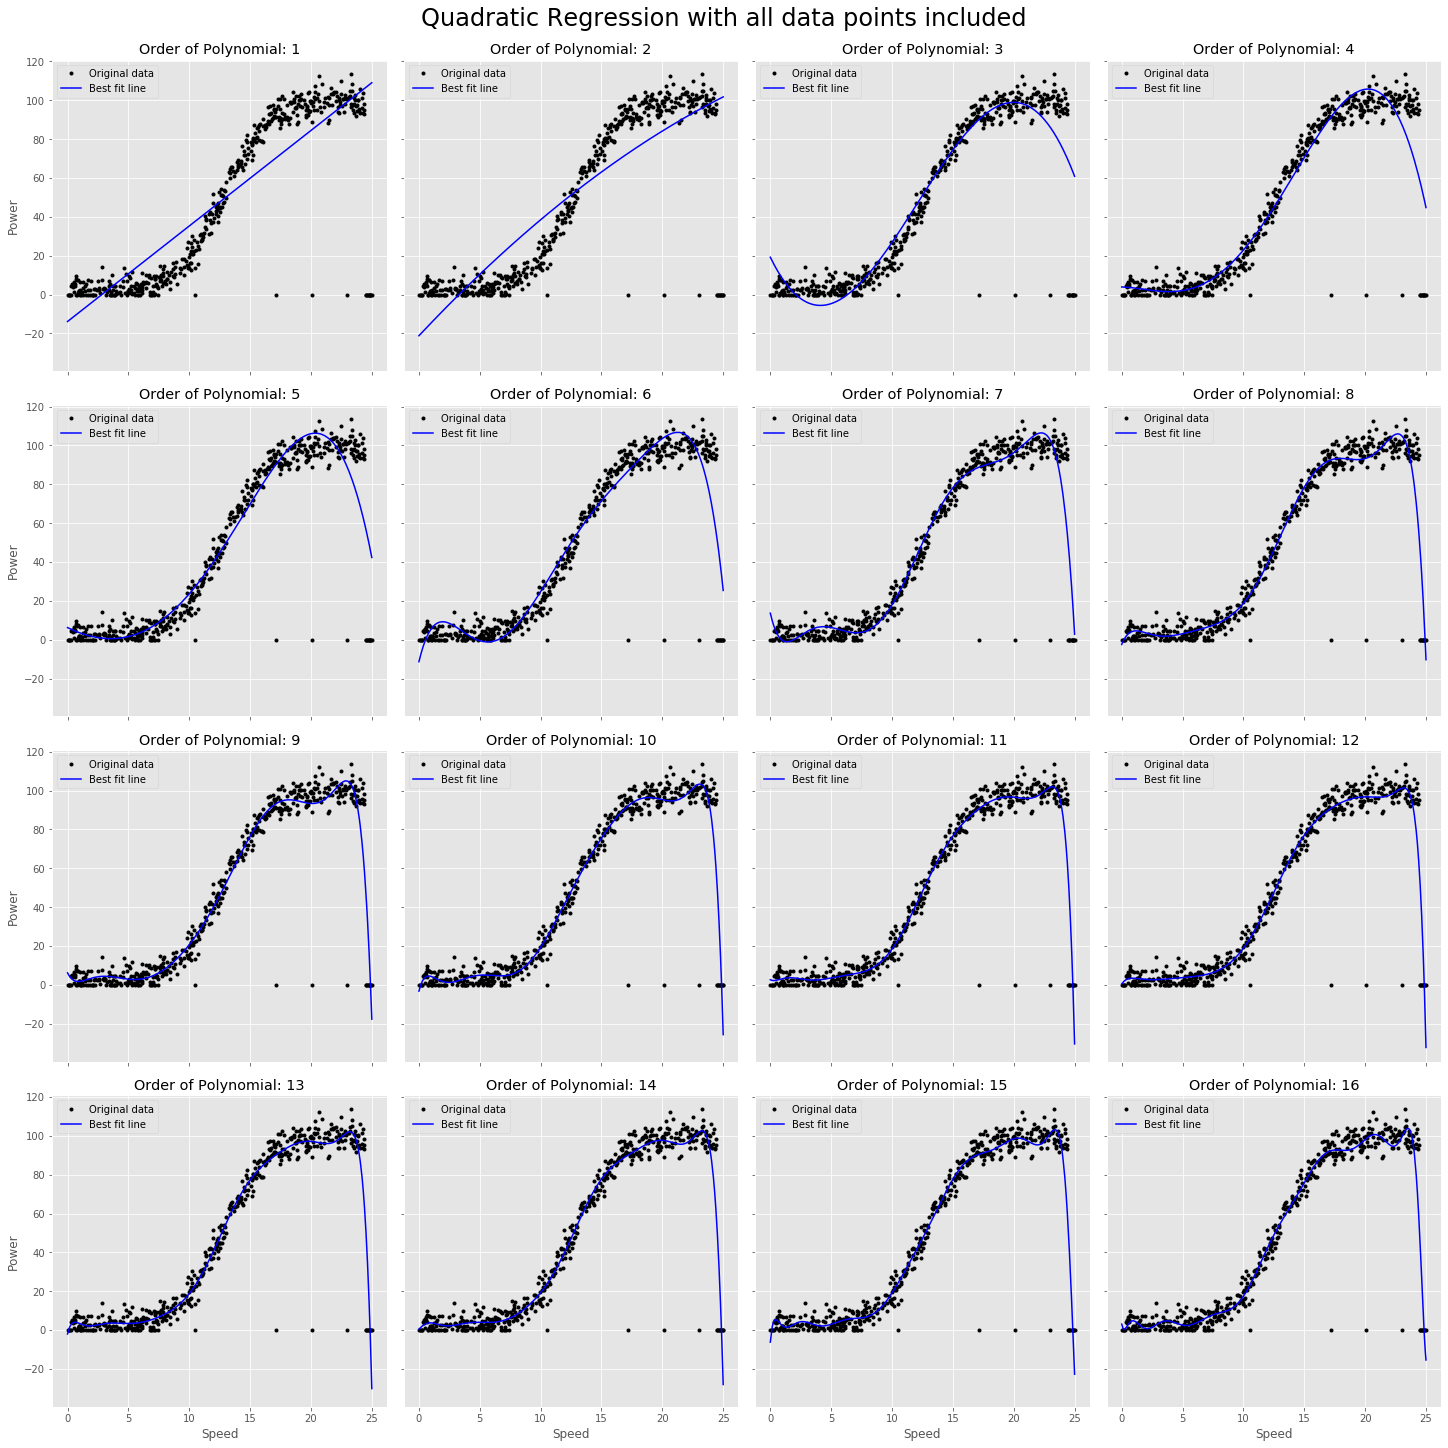

In [10]:
#store the cost values for each regression model when including all data points
costsWith = np.empty(0)
rmseWith = np.empty(0)

ncols = 4
nrows = ncols
size = ncols**2
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(20,20), sharex=True, sharey=True, constrained_layout=True)
axes = axes.flatten()
for i in range(size):
    polys = np.empty(500)
    polys = np.polyfit(df[columns[0]], df[columns[1]], i+1)
    elements = []
    for j in range(len(polys)):
        if j == len(polys)-1:
            elements.append(df[columns[0]]-df[columns[0]]+polys[j])
            continue
        elements.append(polys[j]*df[columns[0]]**(len(polys)-1-j))
    axes[i].plot(df[columns[0]], df[columns[1]], 'k.', label='Original data')
    axes[i].plot(df[columns[0]], np.sum(elements, axis=0), 'b-', label='Best fit line')
    axes[i].set_title(f"Order of Polynomial: {len(polys)-1}")
    axes[i].legend()
    if i >= size - ncols:
        axes[i].set_xlabel('Speed')
    if i % ncols == 0:
        axes[i].set_ylabel('Power')
    cost = np.sum([(df[columns[1]][i] - (np.sum(elements, axis=0))[i])**2 for i in range(df[columns[0]].size)])
    costsWith = np.append(costsWith, [cost])
    rmse = np.sqrt(np.sum([(df[columns[1]][i] - (np.sum(elements, axis=0))[i])**2 for i in range(df[columns[0]].size)]) / 500)
    rmseWith = np.append(rmseWith, [rmse])
plt.suptitle("Quadratic Regression with all data points included", fontsize=24)
plt.show()

In [11]:
poly = np.arange(1,17, dtype=int)
costsArray = np.hstack((poly.reshape(16,1), costsWith.reshape(16,1), costsWithout.reshape(16,1), rmseWith.reshape(16,1), rmseWithout.reshape(16,1)))
columnNames = ["Polynomial Order", "Cost (including all datapoints)", "Cost (excluding final 10 data points)", "RMSE (including final 10 data points)", "RMSE (excluding final 10 data points)"]
costDF = pd.DataFrame(costsArray, columns=columnNames)
costDF

,Polynomial Order,Cost (including all datapoints),Cost (excluding final 10 data points),RMSE (including final 10 data points),RMSE (excluding final 10 data points)
0,1.0,234241.164153,108402.478046,21.644453,14.873787
1,2.0,228833.270577,107020.725553,21.393142,14.778689
2,3.0,103967.819471,46458.547578,14.419974,9.737215
3,4.0,89525.136220,45727.741218,13.380967,9.660327
4,5.0,89274.043596,37922.952120,13.362189,8.797373
5,6.0,78891.146255,37842.152386,12.561142,8.787996
6,7.0,62039.928473,36558.671885,11.139114,8.637681
7,8.0,56434.829644,36529.061237,10.624013,8.634182
8,9.0,54863.134071,36211.678028,10.475031,8.596591
9,10.0,53076.022667,36210.245607,10.303011,8.596421


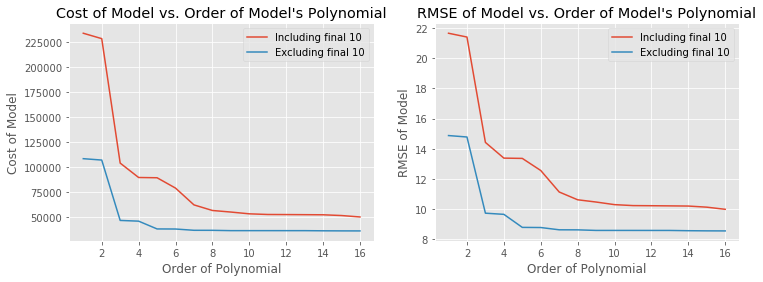

In [12]:
fig, axes = plt.subplots(1,2, figsize=(12,4))
axes[0].plot(poly, costsWith,'-', label="Including final 10")
axes[0].plot(poly, costsWithout, '-', label="Excluding final 10")
axes[0].set_title("Cost of Model vs. Order of Model's Polynomial")
axes[0].set_xlabel("Order of Polynomial")
axes[0].set_ylabel("Cost of Model")
axes[0].legend()

axes[1].plot(poly, rmseWith,'-', label="Including final 10")
axes[1].plot(poly, rmseWithout, '-', label="Excluding final 10")
axes[1].set_title("RMSE of Model vs. Order of Model's Polynomial")
axes[1].set_xlabel("Order of Polynomial")
axes[1].set_ylabel("RMSE of Model")
axes[1].legend()

plt.show()

Once the order of the model's polynomial increase to seven, the reduction in cost/error plateaues. Thus, in choosing an acceptable regression model capable of predicting power based on speed, we should be satisfied that a quadtratic regression model with a polynomial degree of 7. Of course, this is assuming that we are correct in saying that for values of speed greater than 24.399, power is zero.

In [13]:
coeffs = np.polyfit(df[columns[0]][:490], df[columns[1]][:490], 7)
str=""
for i in range(len(coeffs) - 1):
    str += f"{coeffs[i]}*x**{len(coeffs)-i-1} + "
str += f"{coeffs[-1]}"
print(f"Our lingear regression function is: {str}")

Our lingear regression function is: -4.1813898577346955e-06*x**7 + 0.0003651883528248506*x**6 + -0.012265248020067567*x**5 + 0.19620553503633736*x**4 + -1.51191002557609*x**3 + 5.438318487916376*x**2 + -7.637853234946435*x**1 + 5.476148029806635


Thus the mathematical definition of the relationship between speed (x) and power (y) in our regression model is as follows:

$x > 0 \\y > 0\\0 < x < 24.400, f(x) = -4.1813898577346955e^{-06}x^7 + 0.0003651883528248506x^6 + -0.012265248020067567x^5 + 0.19620553503633736x^4 + -1.51191002557609x^3 + 5.438318487916376x^2 + -7.637853234946435x + 5.476148029806635 \\x >= 24.400, f(x) = 0$


The algorithm for predicting power based on speed could thus be defined as a function as follows:

In [14]:
def predictPower(x):
    try:
        float(x)
        if x < 0:
            return "Speed cannot have a negative value."
        elif x > 24.399:
            return 0
        else:
            return (-4.1813898577346955e-06*x**7 + 0.0003651883528248506*x**6 + -0.012265248020067567*x**5 + 0.19620553503633736*x**4 + -1.51191002557609*x**3 + 5.438318487916376*x**2 + -7.637853234946435*x**1 + 5.476148029806635)
    except:
        return "Speed must be a number."

print(predictPower(10))
print(predictPower(20))
print(predictPower(40))
print(predictPower(0))
print(predictPower(-4))

19.924441500010385
96.73377837649986
0
5.476148029806635
Speed cannot have a negative value.


For a comparison of these regression models with a regression model built using Keras' neural networks, see my project for the Machine Learning and Statistics module, [here] (https://github.com/ashleycampion/GMIT_machine_learning_and_statistic_module/blob/main/Project.ipynb).